In [150]:
import pandas as pd
import nltk
import numpy as np
#doesnt lemmatize properly
#cannot do the same features as english due to tagalog being a low resource language


In [151]:
def remove_quotes(x):
    x = x.replace('“', '')
    x = x.replace('”', '')
    x = x.replace('"', '')
    return x

In [152]:
df = pd.read_csv('Scraped_Tagalog_Headlines.csv')
df = df.dropna(axis=0).reset_index(drop=True)
df['Statement'] = df['Statement'].apply(lambda x: remove_quotes(x))
df

,Statement,Rating
0,"Lalaki patay sa pamamaril sa Tondo, Maynila",Real
1,"50 Pinoy na naipit sa kaguluhan sa Sudan, nail...",Real
2,#BoyingResign: Netizens galit kay DOJ Chief Re...,Real
3,‘Backdoor entry’ ng Grab sa motorcycle taxi pi...,Real
4,Doktor nangangamba na na-mild stroke si De Lima,Real
...,...,...
3447,"Remembering Marky Cielo, Proud Igorot and Star...",Fake
3448,"Netizen, inilabas ang sekretong galit dahil la...",Fake
3449,"Pinoy Vlogger na tumulong kay Nas Daily noon, ...",Fake
3450,GRABE! UNANG GABI NG LAMAY SA BUROL NI KRIS AQ...,Fake


In [153]:
import spacy
import spacy.lang.tl as s_tl
tl_stopwords = s_tl.stop_words.STOP_WORDS

In [154]:
from sacremoses import MosesTokenizer
import simplemma as slma
mt = MosesTokenizer('tl')

In [155]:
# from bs4 import BeautifulSoup
# from requests_html import HTMLSession
# from collections import defaultdict
# session = HTMLSession()


# def slang_scraper(url, element, n_pages, site_abbv ,test=False):
#     exceptions = ['Posts navigation',"Search the Dictionary","LET’S STUDY THE BASICS","POPULAR TOPICS","ENTRIES JUST UPDATED","Search our Website", 'Filipino Slang – Inverted Syllables', 'Examples of Filipino Slang Words']
#     headlines = []
    
#     for n in range(1, n_pages):
#         if n_pages > 2:
#             r = session.get(url.format(page=n))
#         else:
#             r = session.get(url)
#         soup = BeautifulSoup(r.content, "html.parser")
#         articles = soup.find_all(element)
#         for headline in articles:
#             acc_text = headline.text
#             if acc_text != '' and acc_text not in exceptions:
#                 headlines.append(acc_text.lower())
#                 print(acc_text.lower())

#         if test == True:
#             break
    
#     if test == True:
#         return headlines
    
#     print(len(headlines))
#     file = open(f'{site_abbv}_words.txt','w')
#     for news in headlines:
#         file.write(news+"\n")
#     file.close()
#     return headlines

In [156]:
with open('tag_slang_words.txt') as f:
    lines = f.readlines()
    slang_words = [line.replace('\n','') for line in lines]


In [157]:
slang_words

['bagets',
 'dehins',
 'astig',
 'utol',
 'tsekot',
 'erpat',
 'resbak',
 'bokal',
 'monay',
 'topak',
 'hokage',
 'damo',
 'pasharks',
 'pashark',
 'badap',
 'abnoy',
 'endo',
 'oblo',
 'matsala',
 'ermat',
 'ebak',
 'hinayupak',
 'pakshet',
 'helmet',
 'lespu',
 'amp',
 'adik',
 'hugot',
 'kepyas',
 'budol',
 'anyare',
 'ansabe',
 'pak',
 'tol',
 'chaka',
 'jowa',
 'paminta',
 'apir',
 'wais',
 'petmalu',
 'tisoy',
 'epal',
 'banat',
 'hanash',
 'sinetch',
 'jeproks',
 'scoobs',
 'plok-plok',
 'burger',
 'isputing',
 'buking',
 'atabs',
 'jakol',
 'getsing',
 'pototoy',
 'bomalabs',
 'shunga',
 'adidas',
 'stariray',
 'repakol',
 'omsim',
 'praning',
 'asumera',
 'erp',
 'gora',
 'istokwa',
 'gapak',
 'momol',
 'oum',
 'werpa',
 'sholbog',
 'atik',
 'petiks',
 'purita',
 'yosi',
 'bopol',
 'etats',
 'harbat',
 'engot',
 'senglot',
 'tsibugan',
 'chuway',
 'tsibog',
 'moot',
 'kaburyo',
 'lomag',
 'amats',
 'etneb',
 'junakis',
 'adnagam',
 'taklesa',
 'dedbol',
 'basted',
 'gamol',
 

In [158]:
# curse_words = slang_scraper('https://www.buzzfeed.com/isabellelaureta/anak-bad-yan', 
#                              ('h2', {'class':'subbuzz__header subbuzz__header--standard subbuzz__title '}), 
#                             2, 
#                              'curse', 
#                              test=False)

In [159]:
# https://www.buzzfeed.com/isabellelaureta/anak-bad-yan
with open('curse_words.txt') as f:
    lines = f.readlines()
    curse_words = [line.replace('\n','') for line in lines]

In [160]:
curse_words




['hudas',
 'putangina',
 'lintik',
 'ulol',
 'gago',
 'tarantado',
 'buwisit',
 'burat',
 'kupal',
 'leche',
 'ungas',
 'punyeta',
 'hinayupak',
 'pucha',
 'pestengyawa',
 'pakshet',
 'tanga',
 'tae',
 'panget',
 'titi',
 'puta',
 'kantotero',
 'bobo',
 'panget']

In [161]:
import re
import string
from collections import Counter

def remove_tl_stopwords(x):
    no_sw = [word for word in x if word not in tl_stopwords]
    return no_sw

def clean_data_untokenized(x):
    x = re.sub("[^a-zA-Z0-9']+", " ", x)
    tokens = x.lower().split()
    # x = mt.tokenize(x)
    #tokens = [token.lower() for token in x ]
    # tokens = x.lower().split() #removes non alphabet, undercase, then splits
    no_sw = remove_tl_stopwords(tokens)
    #lemmatized_tokens = [slma.lemmatize(token, lang='tl') for token in no_sw]
    cleaned = ' '.join(no_sw)
    return cleaned

def clean_tokenized(x):
    x = mt.tokenize(x)
    tokens = [token.lower() for token in x ]
    #tokens = x.lower().split() #removes non alphabet, undercase, then splits
    no_sw = remove_tl_stopwords(tokens)
    #lemmatized_tokens = [slma.lemmatize(token, lang='tl') for token in no_sw]
    return no_sw


def count_unique(x):
    x = re.sub("[^a-zA-Z0-9']+", " ", x)
    tokens = x.lower().split() #removes non alphabet, undercase, then splits
    counts = Counter(tokens)
    unique = sum(value == 1 for value in counts.values())
    return unique

def punc_percenatage(x):
    punctuation = string.punctuation
    return len([c for c in x if c in punctuation])/len(mt.tokenize(x))



    
    #lol please re run the eng news cleaner when this is done

def i_punc_perc(x):
    punctuation_dict = {'.':'period', ',':'comma', ':':'colon', 
                    ';':'semicolon', '?':'question mark', 
                    '!':'exclamation mark', '-':'dash', "'": 'apostrophe',
                    '(':'open parenthesis', ')':'close parenthesis'}

    puncs = [punctuation_dict[punc] for punc in x['Statement'] if punc in punctuation_dict.keys()]

    punc_count_dic = {}
    for punc in list(punctuation_dict.values()):
        punc_count_dic[punc] = puncs.count(punc)/len(mt.tokenize(x['Statement']))

    #period, comma, colon, semicolon, question mark, exclamation mark, dash, apostrophe, open parenthesis, close parenthesis
    return tuple(punc_count_dic.values())


def cap_words(x):
    x = mt.tokenize(x)
    return sum(word.isupper() for word in x)/len(x)

#scraped slangwords from https://www.tagaloglang.com/tag/filipino-slang/
def tagalog_slang(x):
    x = re.sub("[^a-zA-Z0-9']+", " ", x)
    tokens = x.lower().split() #removes non alphabet, undercase, then splits
    return len([word for word in tokens if  word in slang_words])/len(x)

def tagalog_curse(x):
    x = re.sub("[^a-zA-Z0-9']+", " ", x)
    tokens = x.lower().split() #removes non alphabet, undercase, then splits
    return len([word for word in tokens if  word in curse_words])/len(x)


def pos_num(x):
    tags = nltk.pos_tag(mt.tokenize(x))
    count = sum(value[1] == 'CD' for value in tags)
    return count/len(tags)   


In [162]:
df['cleaned'] = df['Statement'].apply(lambda x: clean_data_untokenized(x))
df['cleaned tokenized'] = df['Statement'].apply(lambda x: clean_tokenized(x))
df[['period%', 'comma%', 'colon%', 
    'semicolon%', 'question mark%', 
    'exclamation mark%', 'dash%', 'apostrophe%', 
    'open parenthesis%', 'close parenthesis%']] = df.apply(i_punc_perc, axis=1, result_type="expand")


In [163]:
df['capitalized%'] = df['Statement'].apply(lambda x: cap_words(x))
df['slang words%'] = df['Statement'].apply(lambda x: tagalog_slang(x))
df['curse words%'] = df['Statement'].apply(lambda x: tagalog_curse(x))
df['with numericals%'] = df['Statement'].apply(lambda x:pos_num(x))


In [164]:
def generate_N_grams(text,ngram=1):
  text = re.sub("[^a-zA-Z0-9']+", " ", text)
  words=[word.strip().lower() for word in text.split(" ") if word not in tl_stopwords]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


df['bigrams'] = df['cleaned'].apply(lambda x: generate_N_grams(x,2))

Sentence after removing stopwords: ['lalaki', 'patay', 'pamamaril', 'tondo', 'maynila']
Sentence after removing stopwords: ['50', 'pinoy', 'naipit', 'kaguluhan', 'sudan', 'nailikas']
Sentence after removing stopwords: ['boyingresign', 'netizens', 'galit', 'kay', 'doj', 'chief', 'remulla', 'matapos', 'mahulihan', 'high', 'grade', 'marijuana', 'anak']
Sentence after removing stopwords: ['backdoor', 'entry', 'grab', 'motorcycle', 'taxi', 'pilot', 'pinaiimbestigahan']
Sentence after removing stopwords: ['doktor', 'nangangamba', 'mild', 'stroke', 'de']
Sentence after removing stopwords: ['japan', 'coast', 'guard', 'nagpasalamat', 'pcg', 'pagsagip', 'japanese', 'crew', 'nakaranas', 'maritime', 'accident']
Sentence after removing stopwords: ['employment', 'rate', 'umangat', 'noong', 'pebrero']
Sentence after removing stopwords: ["'amang'", 'landfall', 'lagonoy', 'camarines', 'sur', '11', 'lugar', 'nasa', 'signal', 'no', '1']
Sentence after removing stopwords: ['robinhood', 'padilla', 'gawing'

In [165]:
df['trigrams'] = df['cleaned'].apply(lambda x: generate_N_grams(x,3))

Sentence after removing stopwords: ['lalaki', 'patay', 'pamamaril', 'tondo', 'maynila']
Sentence after removing stopwords: ['50', 'pinoy', 'naipit', 'kaguluhan', 'sudan', 'nailikas']
Sentence after removing stopwords: ['boyingresign', 'netizens', 'galit', 'kay', 'doj', 'chief', 'remulla', 'matapos', 'mahulihan', 'high', 'grade', 'marijuana', 'anak']
Sentence after removing stopwords: ['backdoor', 'entry', 'grab', 'motorcycle', 'taxi', 'pilot', 'pinaiimbestigahan']
Sentence after removing stopwords: ['doktor', 'nangangamba', 'mild', 'stroke', 'de']
Sentence after removing stopwords: ['japan', 'coast', 'guard', 'nagpasalamat', 'pcg', 'pagsagip', 'japanese', 'crew', 'nakaranas', 'maritime', 'accident']
Sentence after removing stopwords: ['employment', 'rate', 'umangat', 'noong', 'pebrero']
Sentence after removing stopwords: ["'amang'", 'landfall', 'lagonoy', 'camarines', 'sur', '11', 'lugar', 'nasa', 'signal', 'no', '1']
Sentence after removing stopwords: ['robinhood', 'padilla', 'gawing'

In [166]:
df.iloc[3].Statement

'‘Backdoor entry’ ng Grab sa motorcycle taxi pilot pinaiimbestigahan'

In [167]:
df.head()

,Statement,Rating,cleaned,cleaned tokenized,period%,comma%,colon%,semicolon%,question mark%,exclamation mark%,dash%,apostrophe%,open parenthesis%,close parenthesis%,capitalized%,slang words%,curse words%,with numericals%,bigrams,trigrams
0,"Lalaki patay sa pamamaril sa Tondo, Maynila",Real,lalaki patay pamamaril tondo maynila,"[lalaki, patay, pamamaril, tondo, ,, maynila]",0.0,0.125000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,"[lalaki patay, patay pamamaril, pamamaril tond...","[lalaki patay pamamaril, patay pamamaril tondo..."
1,"50 Pinoy na naipit sa kaguluhan sa Sudan, nail...",Real,50 pinoy naipit kaguluhan sudan nailikas,"[50, pinoy, naipit, kaguluhan, sudan, ,, naili...",0.0,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,"[50 pinoy, pinoy naipit, naipit kaguluhan, kag...","[50 pinoy naipit, pinoy naipit kaguluhan, naip..."
2,#BoyingResign: Netizens galit kay DOJ Chief Re...,Real,boyingresign netizens galit kay doj chief remu...,"[#, boyingresign, :, netizens, galit, kay, doj...",0.0,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.055556,0.0,0.0,0.000000,"[boyingresign netizens, netizens galit, galit ...","[boyingresign netizens galit, netizens galit k..."
3,‘Backdoor entry’ ng Grab sa motorcycle taxi pi...,Real,backdoor entry grab motorcycle taxi pilot pina...,"[‘, backdoor, entry, ’, grab, motorcycle, taxi...",0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,"[backdoor entry, entry grab, grab motorcycle, ...","[backdoor entry grab, entry grab motorcycle, g..."
4,Doktor nangangamba na na-mild stroke si De Lima,Real,doktor nangangamba mild stroke de,"[doktor, nangangamba, na-mild, stroke, de]",0.0,0.000000,0.000000,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,"[doktor nangangamba, nangangamba mild, mild st...","[doktor nangangamba mild, nangangamba mild str..."


In [168]:
df = df.loc[:, (df != 0).any(axis=0)]
df.to_csv('Tagalog_Headlines_EngFeatures.csv', index=False)
df.to_pickle('Tagalog_Headlines_EngFeatures')

In [169]:
df[df['Rating'] == 'Real']['slang words%'].describe()

count    1734.000000
mean        0.000041
std         0.000766
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.018182
Name: slang words%, dtype: float64

In [170]:
df[df['Rating'] == 'Fake']['slang words%'].describe()

count    1718.000000
mean        0.000173
std         0.001414
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.020202
Name: slang words%, dtype: float64

In [171]:
def get_stats(df, col, rating):
    print(f'sum of all percentages of {col} in {rating} headlines {(df[df["Rating"] == rating][col].sum())}' )
    print(f'frequency of {col} in {rating} headlines {sum((df[df["Rating"] == rating][col] > 0).values)}' )
    print(f'{df[df["Rating"] == rating][col].describe()}')

In [172]:
get_stats(df, "with numericals%", "Real")
get_stats(df, "with numericals%", "Fake")

sum of all percentages of with numericals% in Real headlines 45.171082512603604
frequency of with numericals% in Real headlines 472
count    1734.000000
mean        0.026050
std         0.047271
min         0.000000
25%         0.000000
50%         0.000000
75%         0.055556
max         0.333333
Name: with numericals%, dtype: float64
sum of all percentages of with numericals% in Fake headlines 18.8706115295653
frequency of with numericals% in Fake headlines 285
count    1718.000000
mean        0.010984
std         0.027047
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.181818
Name: with numericals%, dtype: float64


In [173]:
get_stats(df, "capitalized%", "Real")
get_stats(df, "capitalized%", "Fake")


sum of all percentages of capitalized% in Real headlines 86.79153847794959
frequency of capitalized% in Real headlines 841
count    1734.000000
mean        0.050053
std         0.062648
min         0.000000
25%         0.000000
50%         0.000000
75%         0.090909
max         0.400000
Name: capitalized%, dtype: float64
sum of all percentages of capitalized% in Fake headlines 59.29804567205229
frequency of capitalized% in Fake headlines 355
count    1718.000000
mean        0.034516
std         0.127512
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.967742
Name: capitalized%, dtype: float64


In [174]:
get_stats(df, "slang words%", "Real")
get_stats(df, "slang words%", "Fake")

sum of all percentages of slang words% in Real headlines 0.07052614052614052
frequency of slang words% in Real headlines 5
count    1734.000000
mean        0.000041
std         0.000766
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.018182
Name: slang words%, dtype: float64
sum of all percentages of slang words% in Fake headlines 0.2970577459273405
frequency of slang words% in Fake headlines 27
count    1718.000000
mean        0.000173
std         0.001414
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.020202
Name: slang words%, dtype: float64


In [175]:
get_stats(df, "curse words%", "Real")
get_stats(df, "curse words%", "Fake")

sum of all percentages of curse words% in Real headlines 0.0
frequency of curse words% in Real headlines 0
count    1734.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: curse words%, dtype: float64
sum of all percentages of curse words% in Fake headlines 0.0430971510605467
frequency of curse words% in Fake headlines 4
count    1718.000000
mean        0.000025
std         0.000522
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.012346
Name: curse words%, dtype: float64


In [176]:
get_stats(df, "exclamation mark%", "Real")
get_stats(df, "exclamation mark%", "Fake")

sum of all percentages of exclamation mark% in Real headlines 1.6826802138873076
frequency of exclamation mark% in Real headlines 20
count    1734.000000
mean        0.000970
std         0.009697
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.166667
Name: exclamation mark%, dtype: float64
sum of all percentages of exclamation mark% in Fake headlines 23.514214979462608
frequency of exclamation mark% in Fake headlines 334
count    1718.000000
mean        0.013687
std         0.031846
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.300000
Name: exclamation mark%, dtype: float64


In [177]:
df_real = df[df['Rating'] == 'Real']
df_fake = df[df['Rating'] == 'Fake']

In [178]:
real_news_words = []
fake_news_words = []
for l in df[df['Rating'] == 'Real']['cleaned'].values:
    l = [word for word in l.split() if word.isalpha()]
    for token in l:
        real_news_words.append(token)

for l in df[df['Rating'] == 'Fake']['cleaned'].values:
    l = [word for word in l.split() if word.isalpha()]
    for token in l:
        fake_news_words.append(token)


In [179]:
real_news_words_freq = pd.Series(real_news_words).value_counts()[:16]
real_news_words_freq = pd.DataFrame(real_news_words_freq, columns=['Frequency'])
real_news_words_freq


,Frequency
marcos,76
bansa,71
kay,68
matapos,66
patay,60
ilang,52
covid,52
pnp,51
umano,49
pilipinas,48


In [180]:
fake_news_words_freq = pd.Series(fake_news_words).value_counts()[:16]
fake_news_words_freq = pd.DataFrame(fake_news_words_freq, columns=['Frequency'])
fake_news_words_freq

,Frequency
anak,200
matapos,168
lang,116
the,107
to,97
buhay,86
netizen,81
netizens,78
anyos,67
dating,66


In [181]:
unique_to_real = pd.Series([word for word in real_news_words if word not in fake_news_words])
unique_to_real = unique_to_real.value_counts()[:16]
unique_to_real = pd.DataFrame(unique_to_real, columns=['Frequency'])
unique_to_real

# ngrams = pd.Series(l)
# ngrams_sorted = ngrams.value_counts()
# ngrams_sorted = ngrams_sorted[ngrams_sorted > threshold][:top].sort_values(ascending=True)

,Frequency
qc,41
degamo,33
senador,31
chief,29
doh,27
pagpatay,26
posibleng,26
sim,25
kamara,24
pagasa,24


In [182]:
unique_to_fake = pd.Series([word for word in fake_news_words if word not in real_news_words])
unique_to_fake = unique_to_fake.value_counts()[:16]
unique_to_fake = pd.DataFrame(unique_to_fake, columns=['Frequency'])
unique_to_fake 

,Frequency
lolo,43
customer,30
estudyanteng,28
nangyari,28
sikat,26
sobrang,22
aktres,18
amo,17
nya,17
nakapagtapos,17


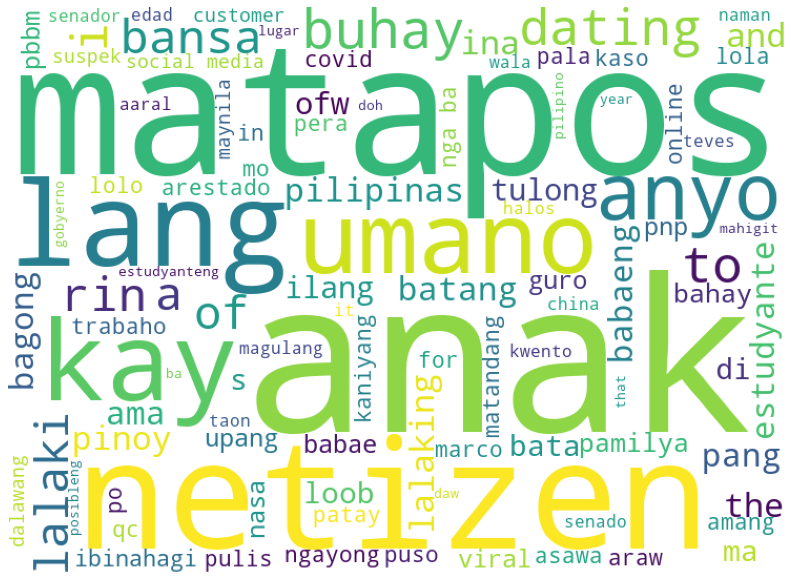

In [183]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def wordcloud_generator(data, file_name):

    stopwords = tl_stopwords
    text = ' '
    for x in data.Statement: 
        
        # typecaste each val to string 
        x =  re.sub("[^a-zA-Z0-9]+", " ", str(x))
    
        # split the value 
        values = x.split() 
        
        # Converts each token into lowercase 
        for i in range(len(values)): 
            values[i] = values[i].lower() 
            
        for words in values: 
            text = text + words + ' '
    
    
    wc = WordCloud(max_words= 100,
                        width = 744, 
                        height = 544,
                        background_color ='white',
                        stopwords=stopwords, 
                        contour_width=3, 
                        contour_color='steelblue',
                        min_font_size = 10).generate(text) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (14, 14)) 
    plt.imshow(wc) 
    plt.axis("off")
    plt.savefig(file_name)

wordcloud_generator(df, 'Visualizations/ALL_TAGALOG_headlines_wordcloud.png')

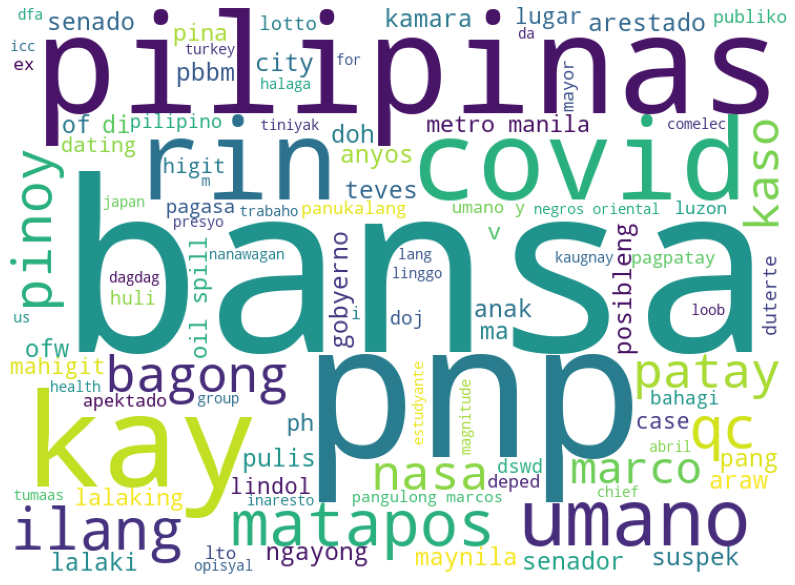

In [184]:
wordcloud_generator(df_real, 'Visualizations/REAL_TAGALOG_headlines_wordcloud.png')

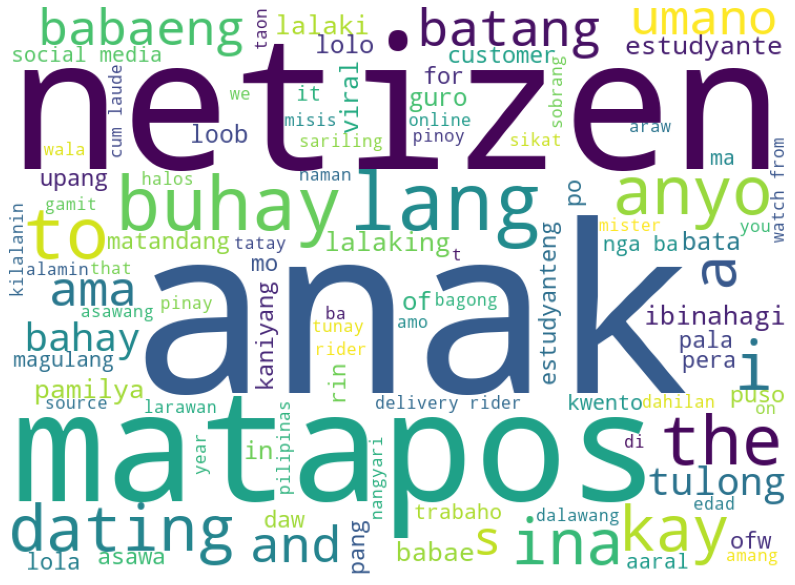

In [185]:
wordcloud_generator(df_fake, 'Visualizations/FAKE_TAGALOG_headlines_wordcloud.png')

In [186]:
def n_gram_graph(df_col, threshold = 5, top=0, size=(10,10), where='whole TAGALOG dataset'):
    l = []
    for arr in df_col.values:
        for list in arr:
            for ngram in list:
                l.append(ngram)
    
    ngrams = pd.Series(l)
    ngrams_sorted = ngrams.value_counts()
    ngrams_sorted = ngrams_sorted[ngrams_sorted > threshold][:top].sort_values(ascending=True)
    title = f'Most frequent {df_col.columns[0]} in {where}'
    ngrams_sorted.plot(kind='barh', title=title, figsize=size)
    plt.savefig(f'Visualizations\{title}')

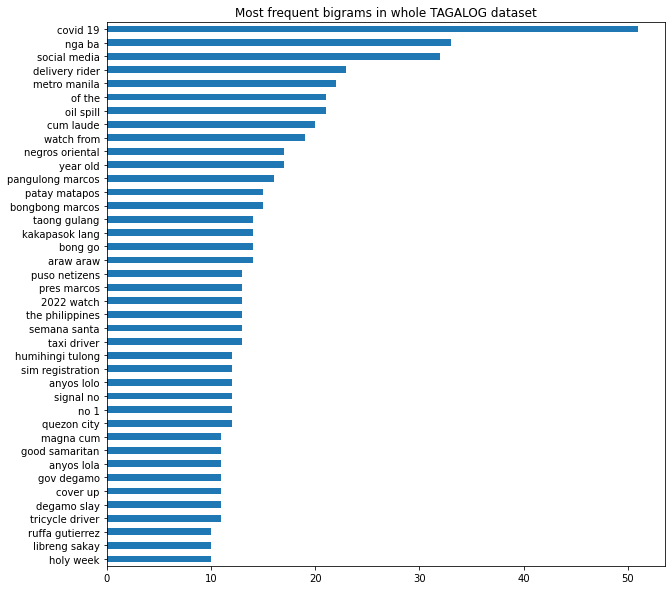

In [187]:
n_gram_graph(df[['bigrams']], threshold=2, top=40)

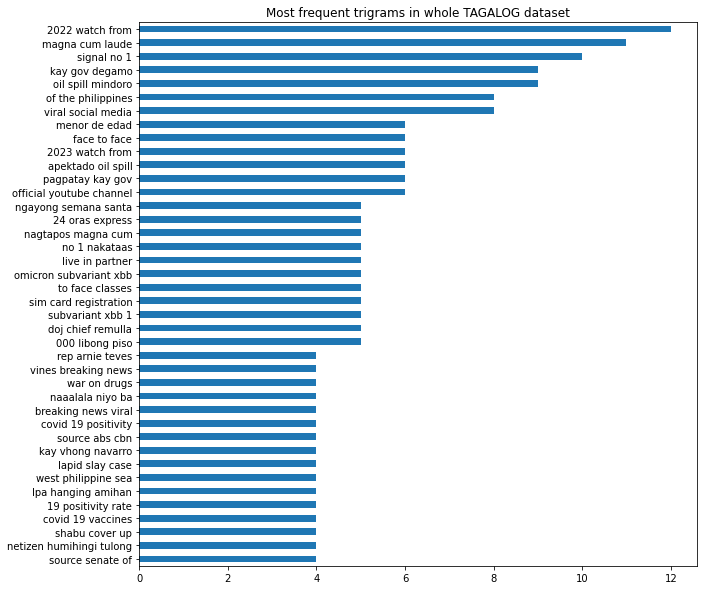

In [188]:
n_gram_graph(df[['trigrams']], threshold=2, top=40)

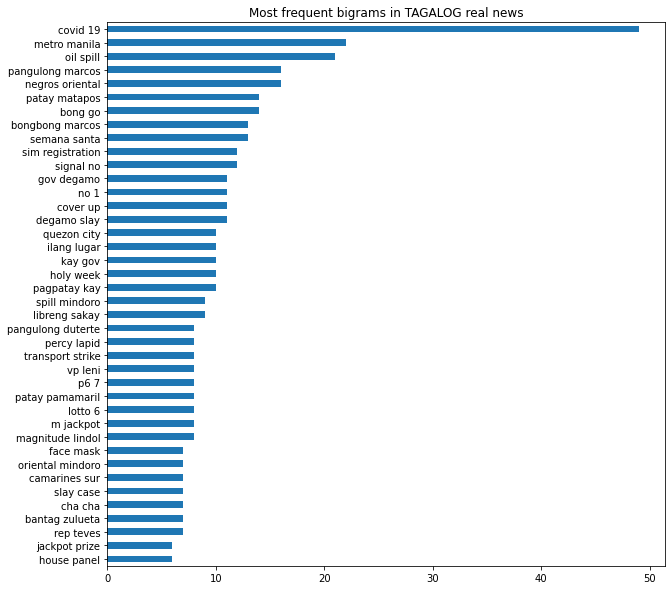

In [189]:
n_gram_graph(df_real[['bigrams']], threshold=2, top=40, where='TAGALOG real news')

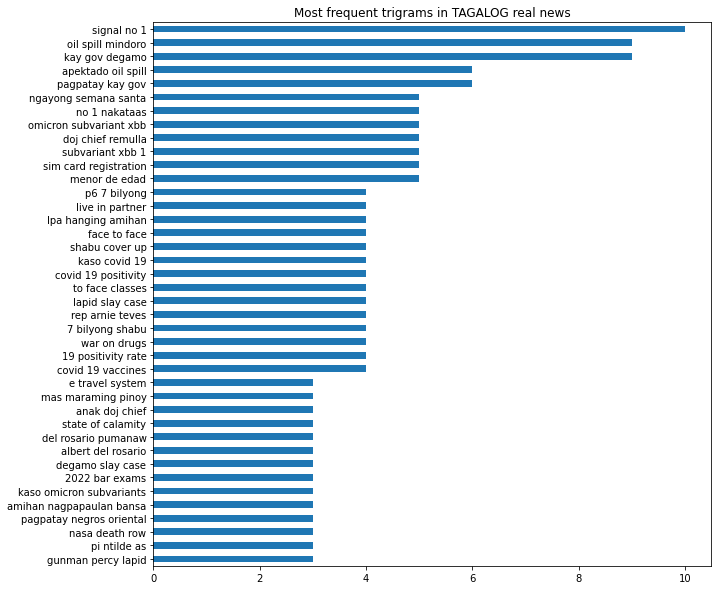

In [190]:
n_gram_graph(df_real[['trigrams']], threshold=2, top=40, where='TAGALOG real news')

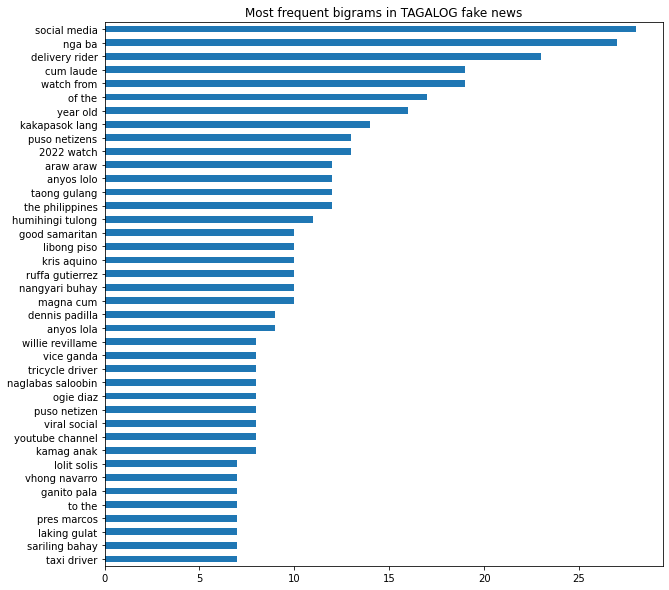

In [191]:
n_gram_graph(df_fake[['bigrams']], threshold=2, top=40, where='TAGALOG fake news')

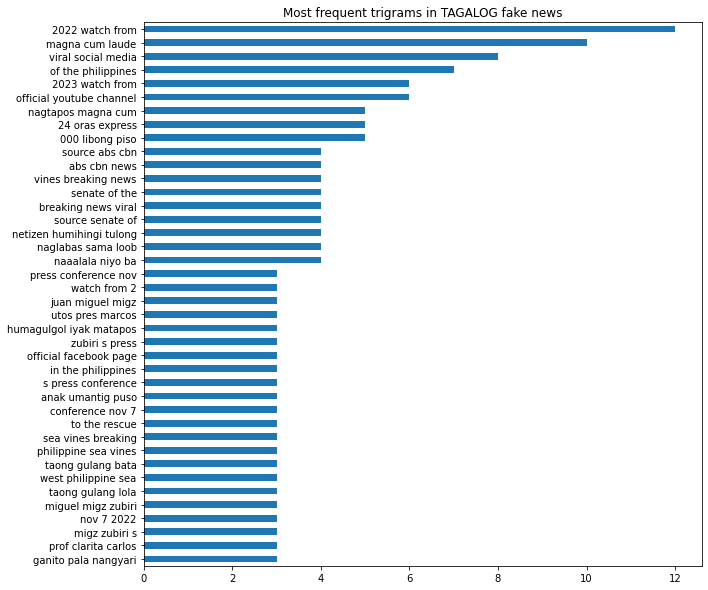

In [192]:
n_gram_graph(df_fake[['trigrams']], threshold=2, top=40, where='TAGALOG fake news')

In [193]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rating'] = le.fit_transform(df.Rating.values)

<ipython-input-193-402eaeb515af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = le.fit_transform(df.Rating.values)


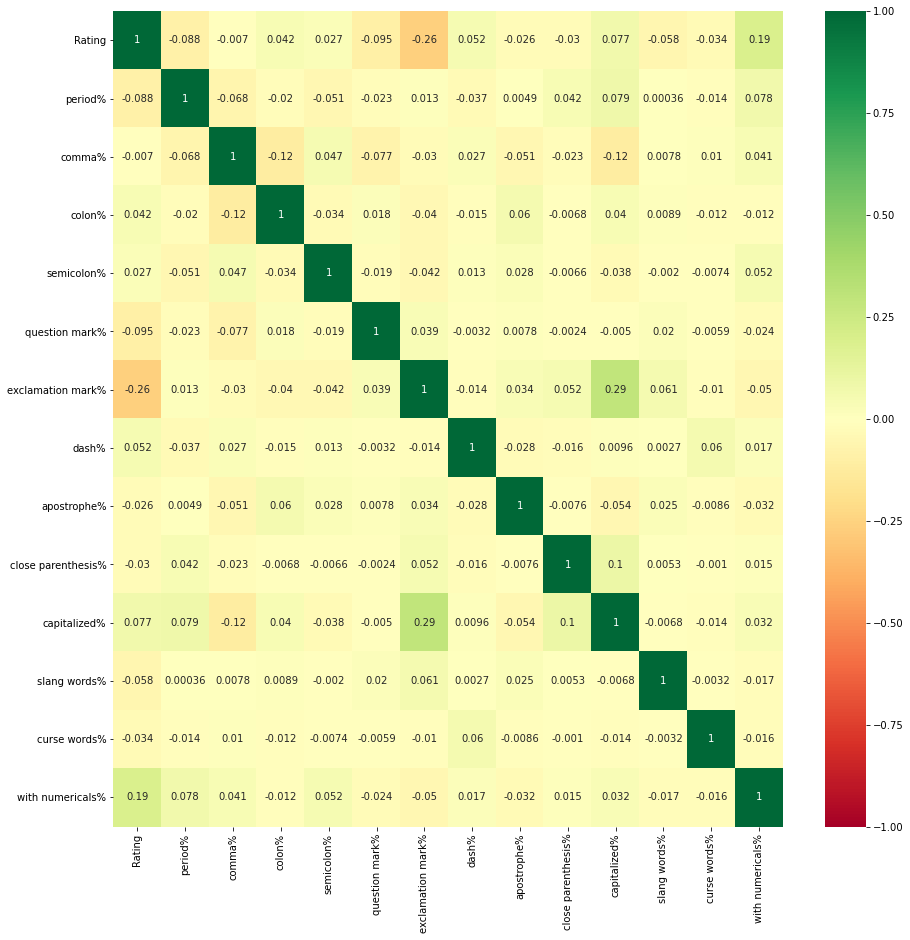

In [194]:


import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,  15))
g = sns.heatmap(df[top_corr_features].corr(), vmin=-1, vmax=1, annot=True , cmap = 'RdYlGn')
